In [1]:
%matplotlib widget
def figure(name, *args, **kwargs):
    plt.close(name)
    plt.figure(name, *args, **kwargs)

import numpy as np
import pylab as plt
from scipy.fftpack import fft, fftfreq, fftshift, ifft, ifftshift
plt.style.use('default')

In [2]:
import ipywidgets as widgets
from ipywidgets import interact
from convert_wavelength import wl2color, wl2n

In [3]:
def get_rays(a, n=1.333):
    if abs(a) >= 1:
        return [[[-2, 2], [a, a]]]
    x1 = np.sqrt(1 - a**2)
    rays = [[[-2, -x1], [a, a]]]
    
    alpha = np.arcsin(a)
    beta = np.arcsin(np.sin(alpha)/n)
    gamma = np.pi/2 -alpha + beta
    d = 2 * np.cos(beta)
    y2 = a - d*np.cos(gamma)
    x2 = d * np.sin(gamma) - x1   
    rays.append([[-x1, x2], [a, y2]])
    
    delta = 2*beta - (np.pi/2 - gamma)
    y3 = y2 - d*np.sin(delta)
    x3 = x2 - d * np.cos(delta)
    rays.append([[x2, x3], [y2, y3]])
    
    tau = 4*beta - 2*alpha
    x4 = -2
    # not working for small refractive indices
    y4 = y3 - (2 - abs(x3)) * np.tan(tau) 
    rays.append([[x3, x4], [y3, y4]])
    
    return rays

interactive(children=(FloatSlider(value=0.5, description='a', layout=Layout(width='500px'), max=1.5, min=-1.5,…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
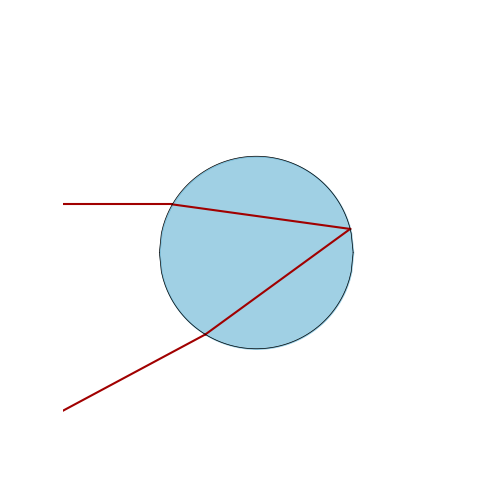

In [8]:
figure(5, figsize=(5,5))
ax = plt.gca()

def plot_func(a, n):
    ax.clear()
    ax.set_xlim([-2., 2.])
    ax.set_ylim([-2., 2.])
    ax.axis('off')
    rays = get_rays(a, n)
#     print(rays)
    for ray in rays:
        plt.plot(ray[0], ray[1], color=wl2color(700))
        
    x_drop = np.linspace(-1, 1, 100)
    plt.fill_between(x_drop, -np.sqrt(1 - x_drop**2), np.sqrt(1 - x_drop**2),
                    color='#43a2ca', alpha=0.5)
    plt.plot(x_drop, np.sqrt(1 - x_drop**2), 'k-', lw=0.5)
    plt.plot(x_drop, -np.sqrt(1 - x_drop**2), 'k-', lw=0.5)
        
slider = widgets.FloatSlider(
    value=0.5,
    min=-1.5,
    max=1.5,
    step=0.03,
    readout=True,
    readout_format='.2f',
    layout={'width': '500px'}
)
slider2 = widgets.FloatSlider(
    value=1.33,
    min=1,
    max=3.,
    step=0.1,
    readout=True,
    readout_format='.2f',
    layout={'width': '500px'}
)
interact(plot_func, a=slider, n=slider2);

## Mix white light

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
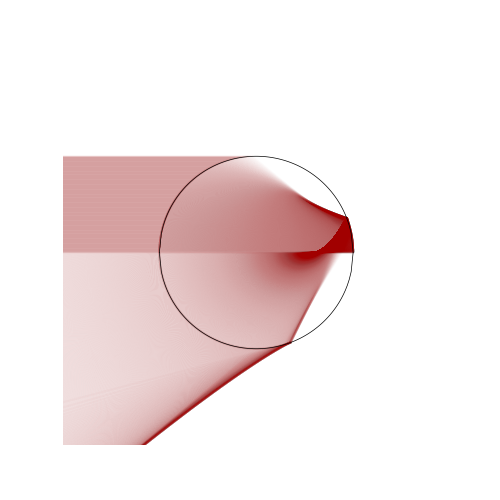

In [9]:
a_s = np.linspace(0., .999, 1000)

figure(6, figsize=(5,5))
ax = plt.gca()
ax.clear()
ax.set_xlim([-2., 2.])
ax.set_ylim([-2., 2.])
ax.axis('off')

for a in a_s:
    rays = get_rays(a)
    for ray in rays:
        plt.plot(ray[0], ray[1], color=wl2color(700), alpha=0.02)
        
x_drop = np.linspace(-1, 1, 100)   
# plt.fill_between(x_drop, -np.sqrt(1 - x_drop**2), np.sqrt(1 - x_drop**2),
#                 color='#43a2ca', alpha=0.5)
plt.plot(x_drop, np.sqrt(1 - x_drop**2), 'k-', lw=0.5)
plt.plot(x_drop, -np.sqrt(1 - x_drop**2), 'k-', lw=0.5)


In [6]:
from itertools import product

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
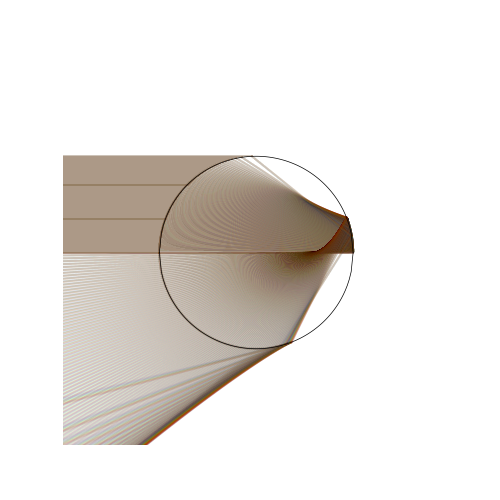

In [10]:
a_s = np.linspace(0., .999, 100)
wl_s = np.linspace(380, 750, 20)

figure(7, figsize=(5,5))
ax = plt.gca()
ax.clear()
ax.set_xlim([-2., 2.])
ax.set_ylim([-2., 2.])
ax.axis('off')

for a, wl in product(a_s, wl_s):
    rays = get_rays(a, wl2n(wl))
    for ray in rays:
        plt.plot(ray[0], ray[1], color=wl2color(wl), alpha=.02)
        
x_drop = np.linspace(-1, 1, 100)   
# plt.fill_between(x_drop, -np.sqrt(1 - x_drop**2), np.sqrt(1 - x_drop**2),
#                 color='#43a2ca', alpha=0.5)
plt.plot(x_drop, np.sqrt(1 - x_drop**2), 'k-', lw=0.5)
plt.plot(x_drop, -np.sqrt(1 - x_drop**2), 'k-', lw=0.5)

In [8]:
from mplcairo import operator_t

ModuleNotFoundError: No module named 'mplcairo'

In [ ]:
operator_t.ADD.